In [1]:
%load_ext autoreload
%pylab inline
%autoreload 2
    
import sys
sys.path.append('../')
import LLMP as L

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Pie Chart vs Bar Chart

To provide the ratios of the lengths of each bar to the longest bar (assuming the longest bar is of length 1.0), I will visually estimate the proportions:

1. The first bar from the left (the shortest) appears to be approximately 0.2 of the longest bar.
2. The second bar seems to be about 0.4 of the longest bar.
3. The third bar, which is the longest and contains the dot, is defined as 1.0.
4. The fourth bar appears to be roughly 0.8 of the longest bar.
5. The fifth and last bar looks to be around 0.6 of the longest bar.

These estimations are based on visual assessment and may not be exact. GT: [1.0, 0.27272728, 0.75757575, 0.121212125, 0.8787879]


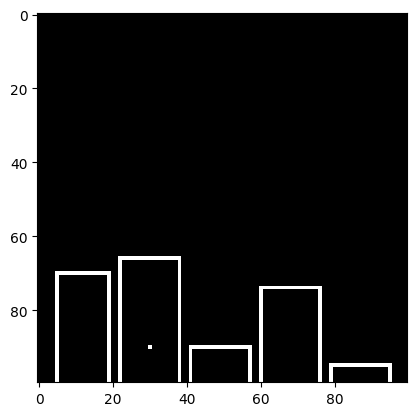

In [16]:
image, label = L.GPImage.figure3('bar')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 bars in total, and the longest bar has a dot inside. Say the size of the longest bar is 1.0. Give me the ratio of length of each bar (excluding the longest bar) to the longest bar. The value should be from 0 to 1.'
answer = L.ChatGPT.query(question, image)
print(answer, 'GT:', label)

In [17]:
import re
values = re.findall(r'(\d+\.\d+)', answer)
values = [float(val) for val in values]
values.pop(0)
values

[0.2, 0.4, 1.0, 0.8, 0.6]

In [18]:
error = []
for x, y in zip(values, label):
    error.append(y-x)
error

[0.8,
 -0.1272727191448212,
 -0.24242424964904785,
 -0.6787878751754761,
 0.2787878751754761]

Based on the image you provided and considering the longest portion marked by the dot has an angle value of 1.0, here are my estimations for the ratios of the angles of each of the other portions, going counterclockwise:

1.0 (longest portion with the dot)
0.6 (next portion counterclockwise from the longest)
0.85 (next portion)
0.45 (next portion)
0.3 (smallest portion)

These values are approximate estimations, as precise angle measurements cannot be made from the image. GT: [1.0, 0.16216215, 0.3783784, 0.8648649, 0.2972973]


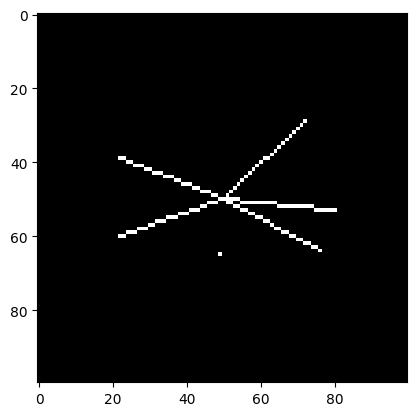

In [6]:
image, label = L.GPImage.figure3('pie')
imshow(image, cmap='gray')

question = 'What do you see? There are 5 portions in the pie, and the longest one has a dot inside. Say the angle of the longest portion is 1.0. Give me the ratio of angle of each portion (excluding the longest portion and go counter-clockwise from the longest one) to the longest portion.(So, the first value should be 1.0 which referes to the longest) Each value should be from 0 to 1. It does not have to be a precise calculation. Just give me your estimation.'
answer = L.ChatGPT.query(question, image)
print(answer, 'GT:', label)

In [13]:
import re
values = re.findall(r'(\d+\.\d+)', answer)
values = [float(val) for val in values]
values.pop(0)
values

[1.0, 0.6, 0.85, 0.45, 0.3]

In [14]:
error = []
for x, y in zip(values, label):
    error.append(y-x)
error

[0.0,
 -0.43783784508705137,
 -0.47162160873413084,
 0.41486488580703734,
 -0.0027027010917663463]